## Imports


In [1]:
import utils
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"], # This matches LaTeX's default font
    "font.size": 11,                       # This matches the 11pt in \documentclass
})

x,y,y_noise = utils.dataset()

small_figsize = (8, 6)

In [55]:
### Comparison of my MSE and R2 implementations with sklearn's
from sklearn.metrics import mean_squared_error, r2_score
from utils import MSE, R2, OLS_parameters, Ridge_parameters

from sklearn.linear_model import LinearRegression, Ridge

y_centered = y - np.mean(y)

X = utils.polynomial_features(x, 5)

ols = LinearRegression(fit_intercept=False)
ridge = Ridge(alpha=1.0, fit_intercept=False)
ols.fit(X, y_centered)
ridge.fit(X, y_centered)
my_OLS = OLS_parameters(X, y_centered)
my_ridge = Ridge_parameters(X, y_centered, regularization=1.0)

print("Mse Comparison with sklearn: " , MSE(y_centered, ols.predict(X)) - mean_squared_error(y_centered, ols.predict(X)))
print("R2 Comparison with sklearn: " , R2(y_centered, ols.predict(X)) - r2_score(y_centered, ols.predict(X)))


print("OLS comparison:", np.linalg.norm(ols.coef_.T - my_OLS))
print("Ridge comparison:", np.linalg.norm(ridge.coef_.T.reshape(-1,1) - my_ridge)) # 


Mse Comparison with sklearn:  0.0
R2 Comparison with sklearn:  0.0
OLS comparison: 1.9679545314275638e-14
Ridge comparison: 8.366617816985243e-16


## OLS Analysis

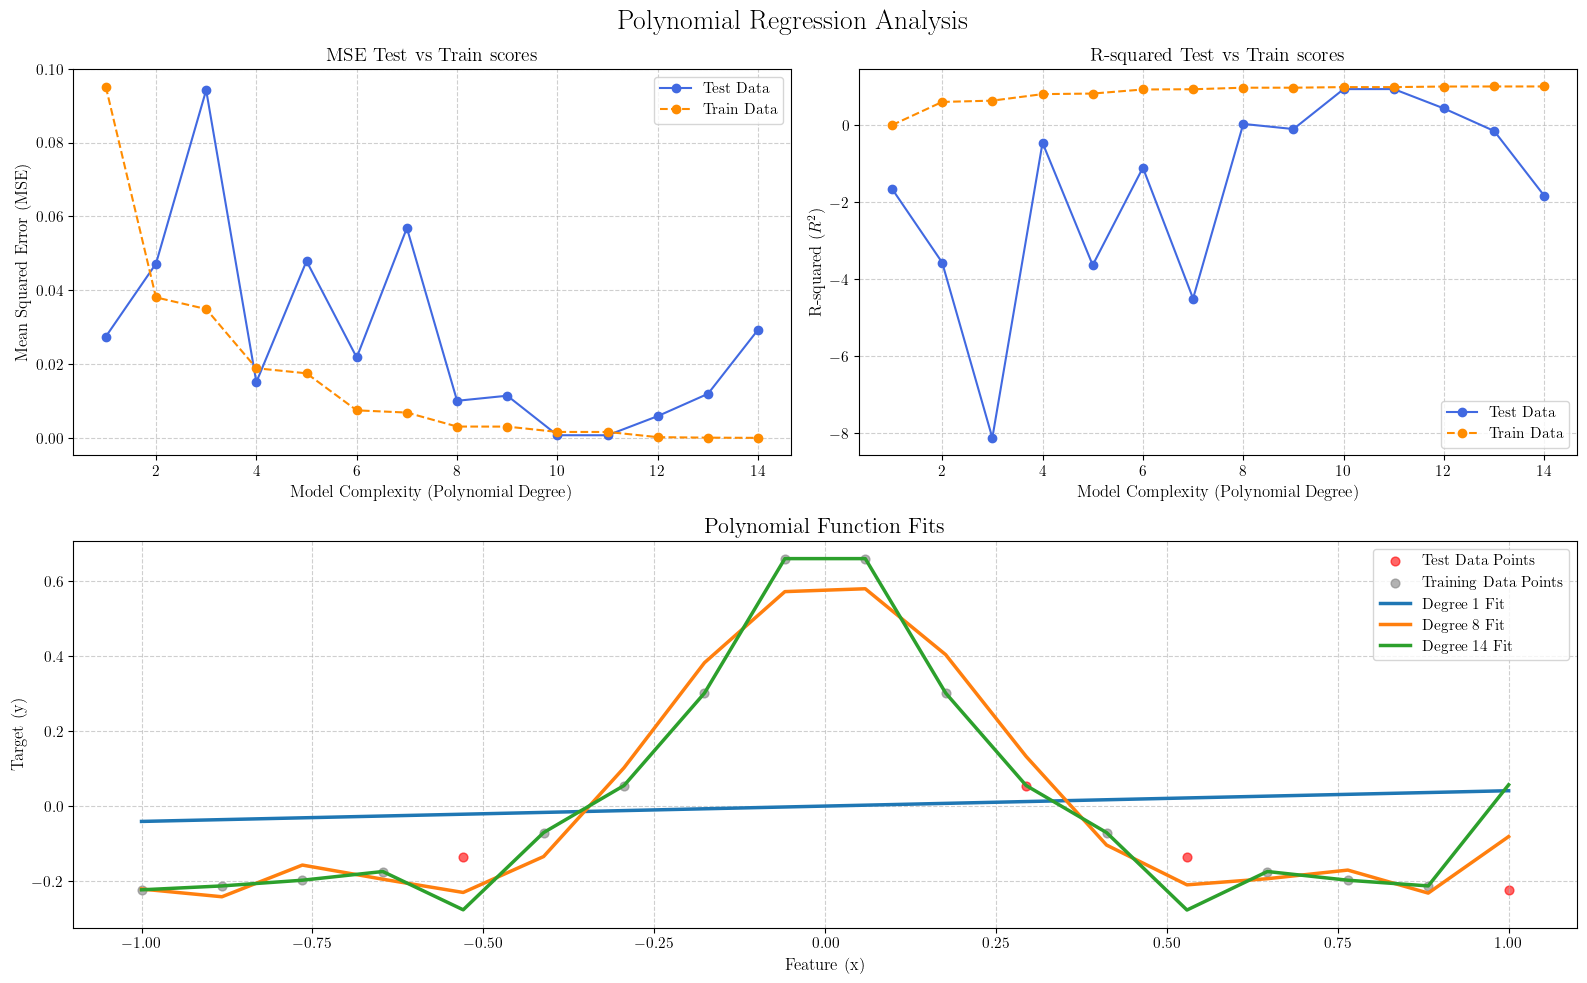

In [3]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from utils import polynomial_features, MSE, R2


plot_predict = {"mse" :[],
                "r2" : []}
plot_train = {"mse":[],
              "r2": []}
beta_norms = []
degrees = np.arange(1, 15)
x,y,y_noise = utils.dataset(18)
#Centering the y values around zero to remove the intercept
y_centered = y - y.mean()

for degree in degrees:
    # Prepare polynomial features and standardize them
    X = utils.polynomial_features(x, degree)
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X, y_centered, test_size=0.2, random_state=57)

    # Fit OLS model
    beta = utils.OLS_parameters(X_train, y_train)
    beta_norms.append(beta)

    # Predictions and metrics
    y_pred = X_test @ beta
    y_train_pred = X_train @ beta
    plot_predict["mse"].append(MSE(y_test, y_pred))
    plot_train["mse"].append(MSE(y_train, y_train_pred))
    plot_predict["r2"].append(R2(y_test, y_pred))
    plot_train["r2"].append(R2(y_train, y_train_pred))

fig = plt.figure(figsize=(16, 10))
gs = gridspec.GridSpec(2, 2)

fig.suptitle('Polynomial Regression Analysis', fontsize=20)

ax1 = fig.add_subplot(gs[0, 0]) # MSE plot
ax2 = fig.add_subplot(gs[0, 1]) # R2 plot
ax3 = fig.add_subplot(gs[1, :]) # Polynomial fits plot

#Clipping to make it better to see
#plot_predict["mse"] = np.clip(plot_predict["mse"], 0, 0.1) 

#MSE plots
ax1.plot(degrees, plot_predict["mse"], label="Test Data", marker='o', color='royalblue')
ax1.plot(degrees, plot_train["mse"], label="Train Data", marker='o', linestyle='--', color='darkorange')
ax1.set_xlabel("Model Complexity (Polynomial Degree)", fontsize=12)
ax1.set_ylabel("Mean Squared Error (MSE)", fontsize=12)
ax1.set_title("MSE Test vs Train scores", fontsize=14)
ax1.set_ybound(upper=0.1)
ax1.legend()
ax1.grid(True, linestyle='--', alpha=0.6)

#R2 plots
ax2.plot(degrees, plot_predict["r2"], label="Test Data", marker='o', color='royalblue')
ax2.plot(degrees, plot_train["r2"], label="Train Data", marker='o', linestyle='--', color='darkorange')
ax2.set_xlabel("Model Complexity (Polynomial Degree)", fontsize=12)
ax2.set_ylabel("R-squared ($R^2$)", fontsize=12)

ax2.set_title("R-squared Test vs Train scores", fontsize=14)
ax2.legend()
ax2.grid(True, linestyle='--', alpha=0.6)


#Polynomial fits plot
X_train, X_test, y_train, y_test = train_test_split(x, y_centered, test_size=0.2, random_state=57)

ax3.scatter(X_test, y_test, label='Test Data Points', color='red', alpha=0.6, s=40)
ax3.scatter(X_train, y_train, label='Training Data Points', color='gray', alpha=0.6, s=40)

plotted_degrees = [1,8,14]
for degree in plotted_degrees:
    X_full = polynomial_features(x, degree)
    scaler = StandardScaler()
    X_full_scaled = scaler.fit_transform(X_full)
    y_pred = X_full_scaled @ beta_norms[degree - 1]
    ax3.plot(x, y_pred, label=f'Degree {degree} Fit', linewidth=2.5)

ax3.set_xlabel("Feature (x)", fontsize=12)
ax3.set_ylabel("Target (y)", fontsize=12)
ax3.set_title("Polynomial Function Fits", fontsize=16)
ax3.legend(fontsize=11)
ax3.grid(True, linestyle='--', alpha=0.6)



plt.tight_layout()
plt.savefig("Combined_Analysis_OLS.png")
plt.show()


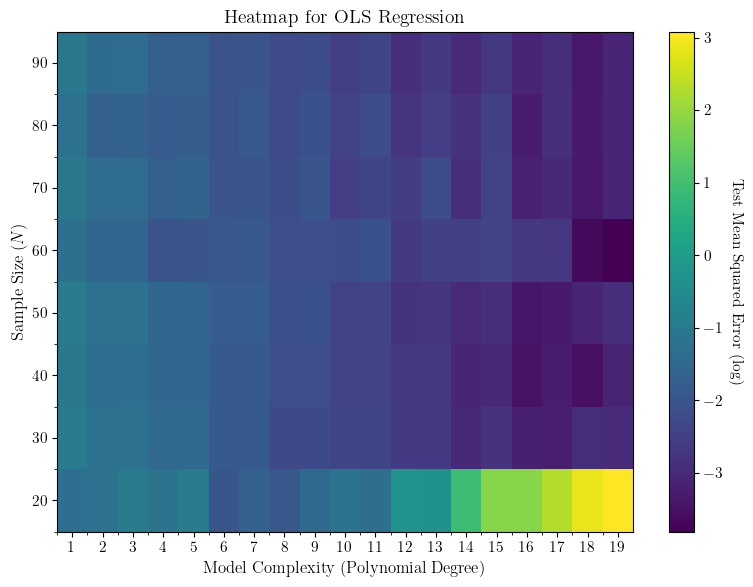

In [4]:
from utils import polynomial_features, MSE, R2, dataset

degrees = np.arange(1, 20)
N_values = np.arange(20, 100, 10)

mse_matrix = np.zeros((len(N_values), len(degrees)))


# Loop over sample sizes and polynomial degrees
for i, N in enumerate(N_values):
    x, y, y_noisy = dataset(n=N)
    y_centered = y - y.mean()
    for j, degree in enumerate(degrees):
    
        X = polynomial_features(x, degree)
        # Standardize Features
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)
        # Split data (80/20 split)

        X_train, X_test, y_train, y_test = train_test_split(
            X_scaled, y_centered, test_size=0.2, random_state=42
        )
        # Predictions
        beta = OLS_parameters(X_train, y_train)
        y_pred = X_test @ beta
        test_mse = MSE(y_test, y_pred)
        
        mse_matrix[i, j] = test_mse

# Plotting the heatmap with log scale
plot_mse = np.log10(mse_matrix)
fig, ax = plt.subplots(figsize=small_figsize)

c = ax.pcolormesh(degrees, N_values, plot_mse, 
                  cmap='viridis')

# Set labels and titles
ax.set_title('Heatmap for OLS Regression', fontsize=14)
ax.set_xlabel('Model Complexity (Polynomial Degree)', fontsize=12)
ax.set_ylabel('Sample Size ($N$)', fontsize=12)

# Adjust tick marks to show the specific degrees and N values tested
# Adjust x-ticks to be centered on the degrees
ax.set_xticks(degrees)
ax.set_xticklabels(degrees)
ax.set_xticks(degrees - 0.5, minor=True)
# Adjust y-ticks to be centered on the N values
ax.set_yticks(N_values)
ax.set_yticklabels(N_values)
N_step = N_values[1] - N_values[0]
ax.set_yticks(N_values - N_step / 2, minor=True)


# Add color bar
cbar = fig.colorbar(c, ax=ax)
cbar.ax.set_ylabel('Test Mean Squared Error (log)', rotation=-90, va="bottom")

# Save the figure
filename = "OLS_Heatmap.pdf"
plt.tight_layout()
plt.savefig(filename)
plt.show()

## Ridge

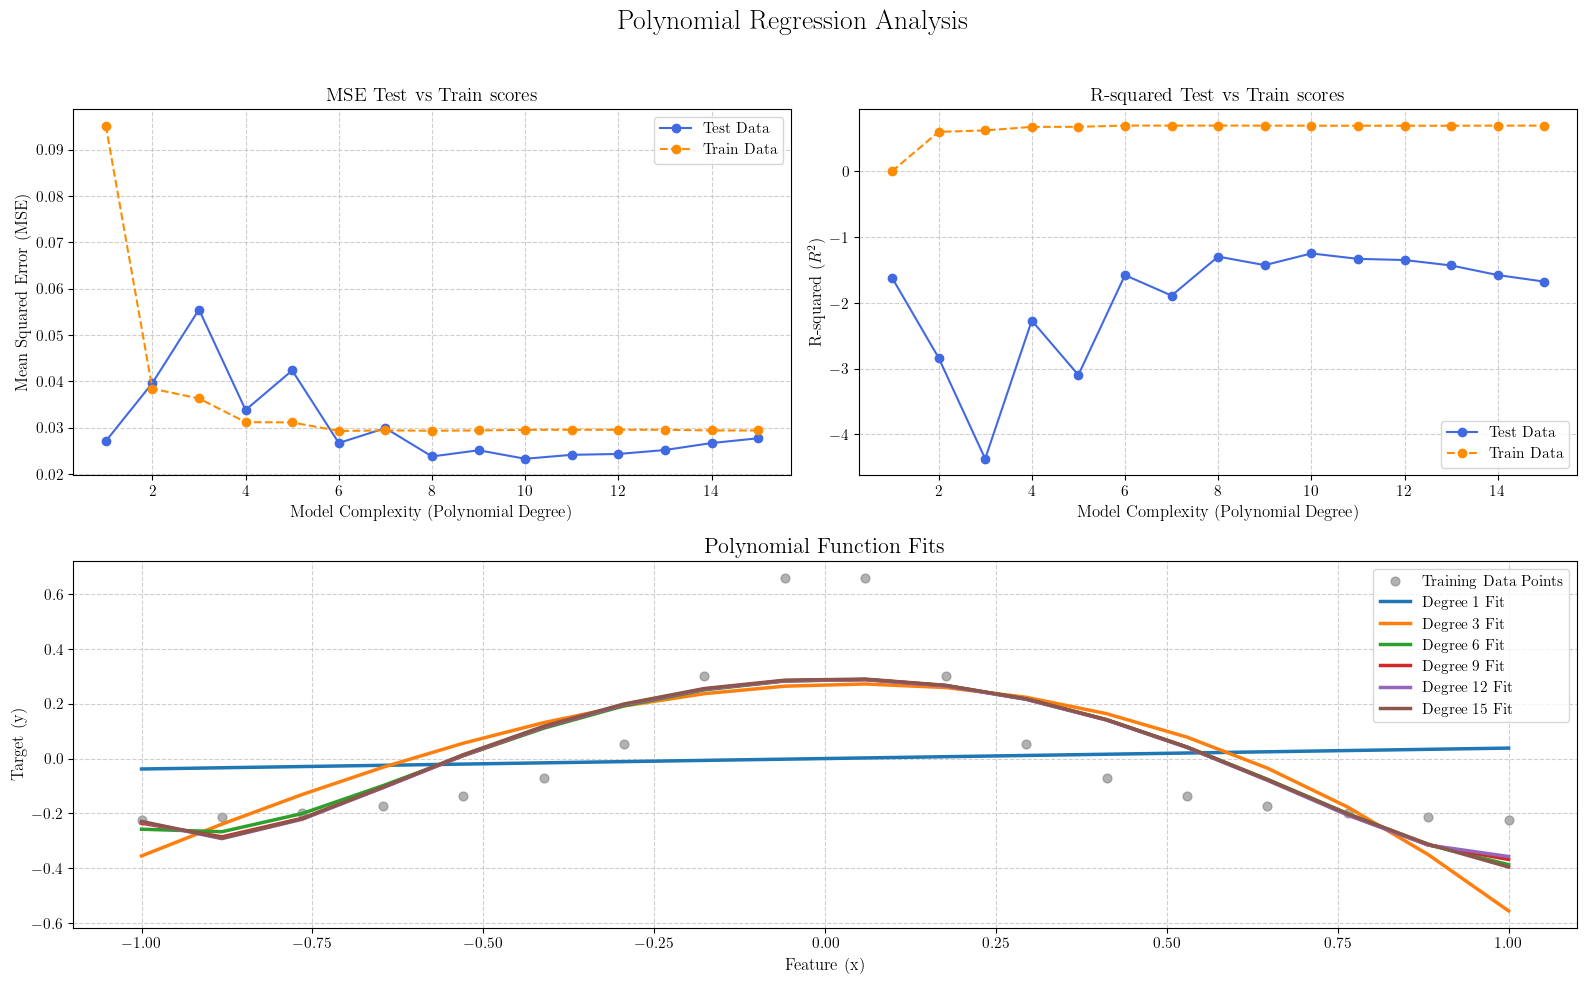

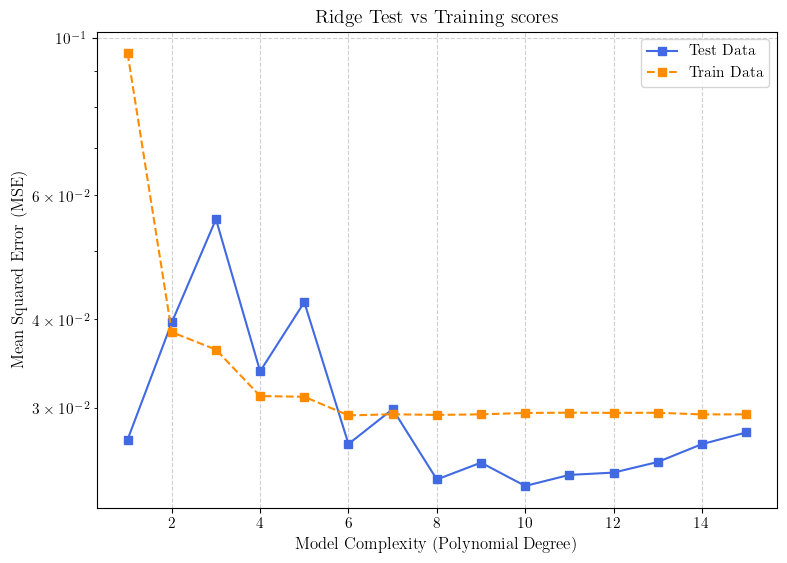

In [5]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

plot_predict = {"mse" :[],
                "r2" : []}
plot_train = {"mse":[],
              "r2": []}
beta_norms = []
degrees = np.arange(1, 16)
x,y,y_noise = utils.dataset(18)

y_centered = y - y.mean() 


for degree in degrees:
    X = polynomial_features(x, degree)
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y_centered, test_size=0.2, random_state=57)
    
    beta = Ridge_parameters(X_train, y_train)
    beta_norms.append(beta)

    y_pred = X_test @ beta
    y_train_pred = X_train @ beta
    plot_predict["mse"].append(MSE(y_test, y_pred))
    plot_train["mse"].append(MSE(y_train, y_train_pred))
    plot_predict["r2"].append(R2(y_test, y_pred))
    plot_train["r2"].append(R2(y_train, y_train_pred))

fig = plt.figure(figsize=(16, 10))
gs = gridspec.GridSpec(2, 2)
fig.suptitle('Polynomial Regression Analysis', fontsize=20)

ax1 = fig.add_subplot(gs[0, 0]) 
ax2 = fig.add_subplot(gs[0, 1]) 
ax3 = fig.add_subplot(gs[1, :]) 

ax1.plot(degrees, plot_predict["mse"], label="Test Data", marker='o', color='royalblue')
ax1.plot(degrees, plot_train["mse"], label="Train Data", marker='o', linestyle='--', color='darkorange')
ax1.set_xlabel("Model Complexity (Polynomial Degree)", fontsize=12)
ax1.set_ylabel("Mean Squared Error (MSE)", fontsize=12)
ax1.set_title("MSE Test vs Train scores", fontsize=14)
ax1.legend()
ax1.grid(True, linestyle='--', alpha=0.6)



# --- Plot 2: R-squared (on the second axis, ax2) ---
ax2.plot(degrees, plot_predict["r2"], label="Test Data", marker='o', color='royalblue')
ax2.plot(degrees, plot_train["r2"], label="Train Data", marker='o', linestyle='--', color='darkorange')
ax2.set_xlabel("Model Complexity (Polynomial Degree)", fontsize=12)
ax2.set_ylabel("R-squared ($R^2$)", fontsize=12)
ax2.set_title("R-squared Test vs Train scores", fontsize=14)
ax2.legend()
ax2.grid(True, linestyle='--', alpha=0.6)
# R2 is bounded by 1, negative values indicate a very poor fit


ax3.scatter(x, y_centered, label='Training Data Points', color='gray', alpha=0.6, s=40)


plotted_degrees = [1, 3, 6, 9, 12, 15]

for degree in plotted_degrees:
    X_full = polynomial_features(x, degree)
    scaler = StandardScaler()
    X_full_scaled = scaler.fit_transform(X_full)
    y_pred = X_full_scaled @ beta_norms[degree - 1]
    
    ax3.plot(x, y_pred, label=f'Degree {degree} Fit', linewidth=2.5)

ax3.set_xlabel("Feature (x)", fontsize=12)
ax3.set_ylabel("Target (y)", fontsize=12)
ax3.set_title("Polynomial Function Fits", fontsize=16)
ax3.legend(fontsize=11)
ax3.grid(True, linestyle='--', alpha=0.6)


# --- Save and show the final combined plot ---
plt.tight_layout(rect=[0, 0, 1, 0.96])
#plt.savefig("Combined_Analysis_Ridge.pdf")
plt.show()

#Plot of only the MSE values
fig, ax = plt.subplots(figsize=small_figsize)





ax.plot(degrees, plot_predict["mse"], label="Test Data", marker='s', color='royalblue')
ax.plot(degrees, plot_train["mse"], label="Train Data", marker='s', linestyle='--', color='darkorange')
ax.set_xlabel("Model Complexity (Polynomial Degree)", fontsize=12)
ax.set_ylabel("Mean Squared Error (MSE)", fontsize=12)
ax.set_yscale('log') 
ax.set_title("Ridge Test vs Training scores", fontsize=14)
ax.legend()
ax.grid(True, linestyle='--', alpha=0.6)


# --- Save and show the final combined plot ---
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig("MSE_RidgeOnly.png")

plt.show()





### Looking at the Regularization 

<>:59: SyntaxWarning: invalid escape sequence '\l'
<>:59: SyntaxWarning: invalid escape sequence '\l'
C:\Users\Anton\AppData\Local\Temp\ipykernel_19660\2796290648.py:59: SyntaxWarning: invalid escape sequence '\l'
  ax.set_ylabel('Regularization $\log_{10}(\lambda)$', fontsize=12)


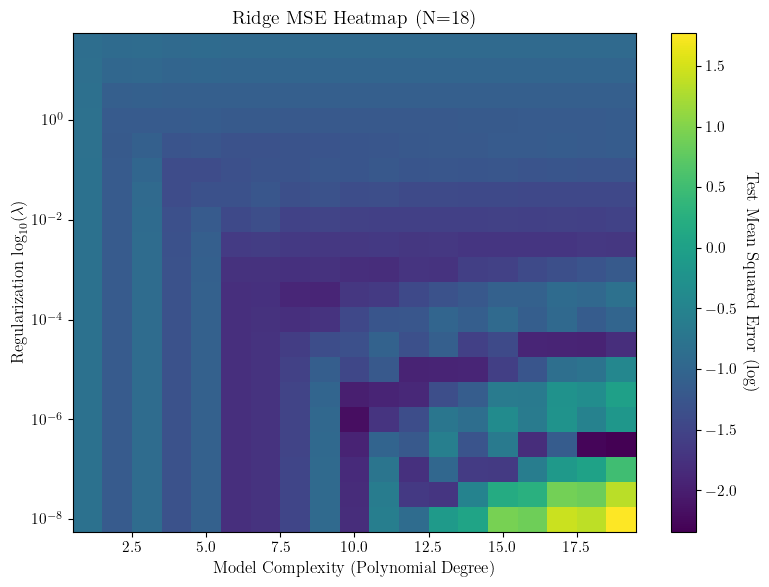

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from utils import polynomial_features, MSE, R2, dataset, Ridge_parameters 



N_fixed = 18                          
degrees = np.arange(1, 20)           
regularizations = np.logspace(-8, 2, 20)  

# Initialize matrix: rows = regularization, columns = degree
# The size must match the loops: (len(regularizations), len(degrees))
mse_matrix = np.zeros((len(regularizations), len(degrees)))

# --- Generate Fixed Data ---
# Use the fixed N for consistency
x, y, y_noisy = dataset(n=N_fixed)
y_centered = y - y.mean()


# --- Outer Loop: Regularization (i) ---
for i, reg in enumerate(regularizations):
    # --- Inner Loop: Degree (j) ---
    for j, degree in enumerate(degrees):
        
        X = polynomial_features(x, degree)
        
        # Standardize Features
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)
        
        # Split data (80/20 split)
        X_train, X_test, y_train, y_test = train_test_split(
            X_scaled, y_centered, test_size=0.2, random_state=42
        )
        
        # Predictions using Ridge with current regularization (reg)
        beta = Ridge_parameters(X_train, y_train, regularization=reg)
        y_pred = X_test @ beta
        test_mse = MSE(y_test, y_pred)
        
        mse_matrix[i, j] = test_mse

# --- Plotting ---
plot_mse = np.log10(mse_matrix) #np.clip(mse_matrix, 0, 0.1) 
fig, ax = plt.subplots(figsize=small_figsize)


log_regularizations = np.log10(regularizations)
c = ax.pcolormesh(degrees, log_regularizations, plot_mse, 
                  cmap='viridis', shading='auto')

# Set labels and titles
ax.set_title(f'Ridge MSE Heatmap (N={N_fixed})', fontsize=14)
ax.set_xlabel('Model Complexity (Polynomial Degree)', fontsize=12)
ax.set_ylabel('Regularization $\log_{10}(\lambda)$', fontsize=12)

# Adjust y-ticks to show the log values
y_tick_positions = log_regularizations[::4] 
ax.set_yticks(y_tick_positions)
ax.set_yticklabels([f'$10^{{{l:.0f}}}$' for l in y_tick_positions]) 

# Add color bar

cbar = fig.colorbar(c, ax=ax)
cbar.ax.set_ylabel('Test Mean Squared Error (log)', rotation=-90, va="bottom", fontsize=12)

plt.tight_layout()
plt.savefig("Ridge_Degree_Lambda_Heatmap.pdf")
plt.show()

### Training data and regularization (Not used)

<>:50: SyntaxWarning: invalid escape sequence '\l'
<>:50: SyntaxWarning: invalid escape sequence '\l'
C:\Users\Anton\AppData\Local\Temp\ipykernel_19660\1542456475.py:50: SyntaxWarning: invalid escape sequence '\l'
  ax.set_ylabel('Regularization $\log_{10}(\lambda)$', fontsize=12)


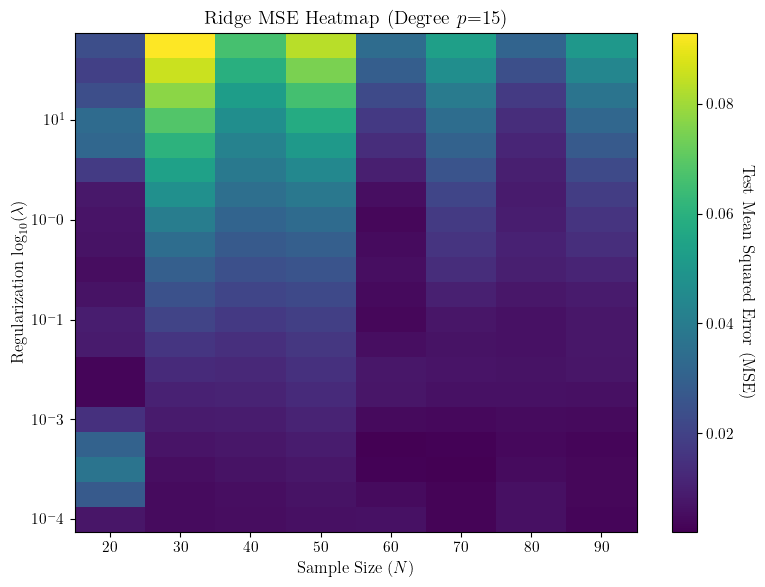

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Assuming these are available in your environment or 'utils'
from utils import polynomial_features, MSE, R2, dataset, Ridge_parameters 
# Note: Added imports for standard ML functions and numpy

# --- Setup Parameters ---
degree_fixed = 15
N_values = np.arange(20, 100, 10)     
regularizations = np.logspace(-4, 2, 20) 

mse_matrix = np.zeros((len(regularizations), len(N_values)))


for j, N in enumerate(N_values):
    x, y, y_noisy = dataset(n=N)
    y_centered = y - y.mean()
    
    X_base = polynomial_features(x, degree_fixed, intercept=True)
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_base)
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y_centered, test_size=0.2, random_state=42
    )

    for i, reg in enumerate(regularizations):
        
        # Predictions using Ridge with current regularization (reg)
        beta = Ridge_parameters(X_train, y_train, regularization=reg)
        y_pred = X_test @ beta
        test_mse = MSE(y_test, y_pred)
        
        mse_matrix[i, j] = test_mse

# --- Plotting ---
plot_mse = np.clip(mse_matrix, 0, 0.1) 
fig, ax = plt.subplots(figsize=small_figsize)

log_regularizations = np.log10(regularizations)
c = ax.pcolormesh(N_values, log_regularizations, plot_mse, 
                  cmap='viridis', shading='auto')

# Set labels and titles
ax.set_title(f'Ridge MSE Heatmap (Degree $p$={degree_fixed})', fontsize=14)
ax.set_xlabel('Sample Size ($N$)', fontsize=12)
ax.set_ylabel('Regularization $\log_{10}(\lambda)$', fontsize=12)

# Adjust X-ticks (N_values)
ax.set_xticks(N_values)
ax.set_xticklabels(N_values)

# Adjust Y-ticks (log lambda)
y_tick_positions = log_regularizations[::4] 
ax.set_yticks(y_tick_positions)
ax.set_yticklabels([f'$10^{l:.0f}$' for l in y_tick_positions]) 

# Add color bar
cbar = fig.colorbar(c, ax=ax)
cbar.ax.set_ylabel('Test Mean Squared Error (MSE)', rotation=-90, va="bottom", fontsize=12)

# Save the figure
filename = "Ridge_N_Lambda_Heatmap.pdf"
plt.tight_layout()
plt.savefig(filename)
plt.show()

## Gradient Descent


### N = 100 (Not used)

<>:63: SyntaxWarning: invalid escape sequence '\e'
<>:63: SyntaxWarning: invalid escape sequence '\e'
C:\Users\Anton\AppData\Local\Temp\ipykernel_19660\1280997297.py:63: SyntaxWarning: invalid escape sequence '\e'
  ax.set_title("Test Set Performance: MSE vs. Iterations (N=100,$\eta = 0.01$)", fontsize=16) # FIX 1: Use ax.set_title()


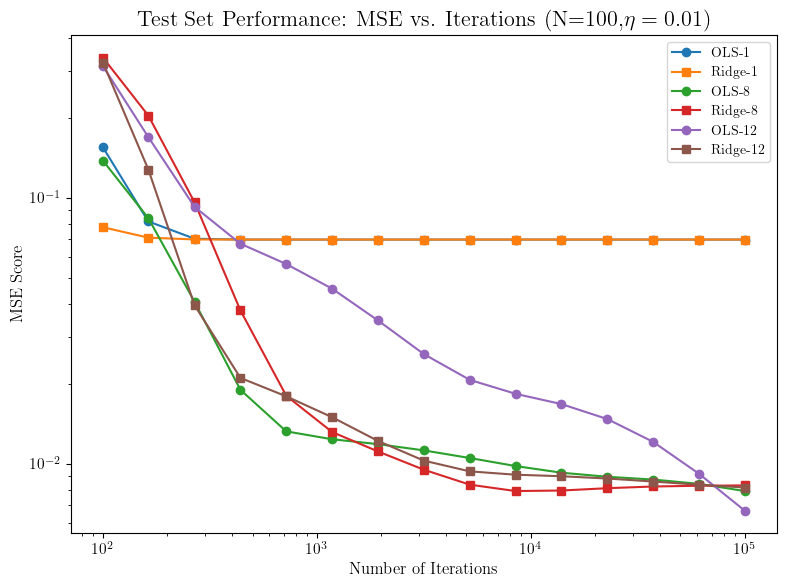

In [8]:
from utils import Gradient_OLS, Gradient_Ridge
# Gradient descent parameters, learning rate eta first
eta = 0.01
lam = 0.001

# Then number of iterations
num_iters = 100000
degrees = [1,8,12]
np.random.seed(42)
iter_saves = np.unique(np.logspace(2, np.log10(num_iters - 1), 15).astype(int))



# Gradient descent Dictonaries
plot_predict = {"OLS" : { },
                "Ridge" : {}}
plot_train = {"OLS":{ },
              "Ridge": { }}
theta_store = {"OLS": {}, "Ridge": {}}



n = 100
x,y,y_noise = dataset(n)

y_centered = y - y.mean() 


for degree in degrees:
    X = polynomial_features(x, degree)
    scalar = StandardScaler()
    X = scalar.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y_centered, test_size=0.2, random_state=57)


    keys = ["OLS", "Ridge"]
    for key in keys: 
        plot_predict[key][degree] = { "mse":[], "r2" : []}
        plot_train[key][degree] = { "mse":[], "r2" : []}  
        theta_store[key][degree] = []
        theta = np.random.randn(X_train.shape[1],1)

        for t in range(num_iters):
            # Compute gradients for OSL and Ridge
            if key == "OLS":
                grad_OLS = Gradient_OLS(X_train, y_train, eta=eta,theta=theta,n=n)
                theta -= eta * grad_OLS
            elif key =="Ridge":
                grad_Ridge= Gradient_Ridge(X_train, y_train, eta=eta, lambda_param=lam,theta=theta,n=n)
                theta -= eta * grad_Ridge
            if t in iter_saves:
                y_pred = X_test @ theta
                y_train_pred= X_train @ theta
                plot_predict[key][degree]["mse"].append(MSE(y_test, y_pred))
                plot_predict[key][degree]["r2"].append(R2(y_test, y_pred))
                theta_store[key][degree].append(theta)
                plot_train[key][degree]["mse"].append(MSE(y_train, y_train_pred))
                plot_train[key][degree]["r2"].append(R2(y_train, y_train_pred))


fig, ax = plt.subplots(figsize=small_figsize)

ax.set_title("Test Set Performance: MSE vs. Iterations (N=100,$\eta = 0.01$)", fontsize=16) # FIX 1: Use ax.set_title()
for degree in degrees:
    ax.plot(iter_saves, plot_predict["OLS"][degree]["mse"], 'o-', label=f"OLS-{degree}")
    ax.plot(iter_saves, plot_predict["Ridge"][degree]["mse"], 's-', label=f"Ridge-{degree}")


ax.set_xlabel("Number of Iterations", fontsize=12)
ax.set_xscale('log')
ax.set_ylabel("MSE Score", fontsize=12)
ax.set_yscale('log') 
ax.legend(fontsize=10)
plt.tight_layout()
plt.savefig("Gradient_Comparison_OLS_Ridge.pdf")
plt.show()




### N=18

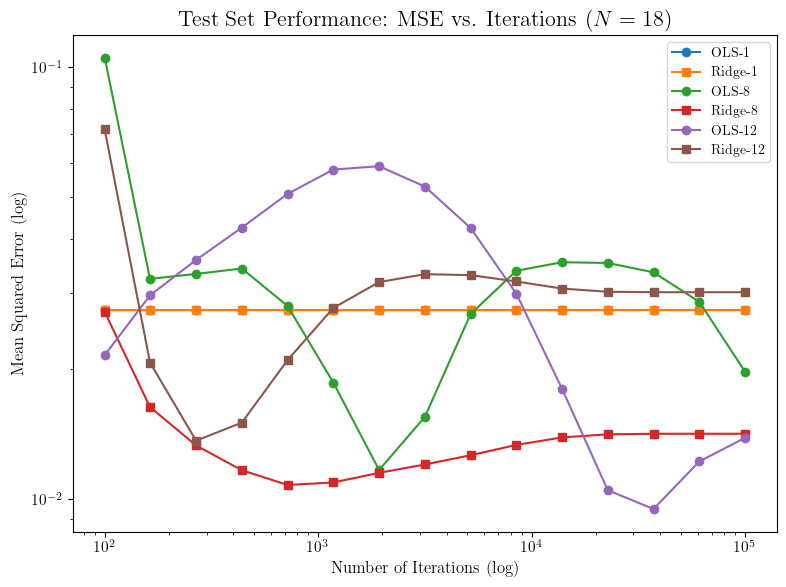

In [9]:
from utils import Gradient_OLS, Gradient_Ridge
# Gradient descent parameters, learning rate eta first
eta = 0.1
lam = 0.001
# Then number of iterations
num_iters = 100000
degrees = [1,8,12]
np.random.seed(42)
iter_saves = np.unique(np.logspace(2, np.log10(num_iters - 1), 15).astype(int))

# Initialize weights for gradient descent


# Gradient descent loop

plot_predict = {"OLS" : { },
                "Ridge" : {}}
plot_train = {"OLS":{ },
              "Ridge": { }}
theta_store = {"OLS": {}, "Ridge": {}}

n = 18
x,y,y_noise = dataset(n)

y_centered = y - y.mean() 


for degree in degrees:
    X = polynomial_features(x, degree)
    scalar = StandardScaler()
    X = scalar.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y_centered, test_size=0.2, random_state=57)


    keys = ["OLS", "Ridge"]
    for key in keys: 
        plot_predict[key][degree] = { "mse":[], "r2" : []}
        plot_train[key][degree] = { "mse":[], "r2" : []}  
        theta_store[key][degree] = []
        theta = np.random.randn(X_train.shape[1],1)

        for t in range(num_iters):
            # Compute gradients for OSL and Ridge
            if key == "OLS":
                grad_OLS = Gradient_OLS(X_train, y_train, eta=eta,theta=theta,n=n)
                theta -= eta * grad_OLS
            elif key =="Ridge":
                grad_Ridge= Gradient_Ridge(X_train, y_train, eta=eta, lambda_param=lam,theta=theta,n=n)
                theta -= eta * grad_Ridge
            if t in iter_saves:
                y_pred = X_test @ theta
                y_train_pred= X_train @ theta
                plot_predict[key][degree]["mse"].append(MSE(y_test, y_pred))
                plot_predict[key][degree]["r2"].append(R2(y_test, y_pred))
                theta_store[key][degree].append(theta)
                plot_train[key][degree]["mse"].append(MSE(y_train, y_train_pred))
                plot_train[key][degree]["r2"].append(R2(y_train, y_train_pred))


fig, ax = plt.subplots(figsize=small_figsize)

ax.set_title("Test Set Performance: MSE vs. Iterations ($N=18$)", fontsize=16) # FIX 1: Use ax.set_title()
for degree in degrees:
    ax.plot(iter_saves, plot_predict["OLS"][degree]["mse"], 'o-', label=f"OLS-{degree}")
    ax.plot(iter_saves, plot_predict["Ridge"][degree]["mse"], 's-', label=f"Ridge-{degree}")


ax.set_xlabel("Number of Iterations (log)", fontsize=12)
ax.set_xscale('log')
ax.set_ylabel("Mean Squared Error (log)", fontsize=12)
ax.set_yscale('log') 
ax.legend(fontsize=10)
plt.tight_layout()
plt.savefig("Gradient_Comparison_OLS_Ridge_18.pdf")
plt.show()




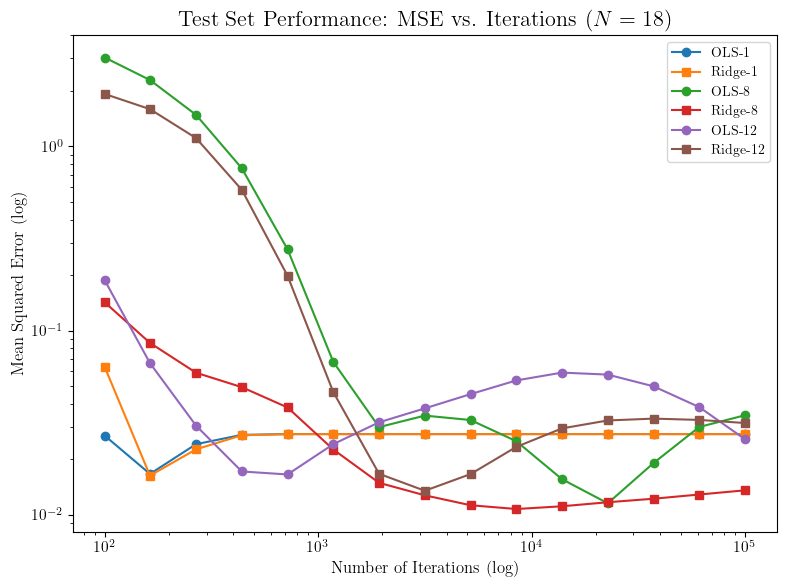

In [10]:
from utils import Gradient_OLS, Gradient_Ridge
# Gradient descent parameters, learning rate eta first
eta = 0.01
lam = 0.001
# Then number of iterations
num_iters = 100000
degrees = [1,8,12]
np.random.seed(42)
iter_saves = np.unique(np.logspace(2, np.log10(num_iters - 1), 15).astype(int))

# Initialize weights for gradient descent


# Gradient descent loop

plot_predict = {"OLS" : { },
                "Ridge" : {}}
plot_train = {"OLS":{ },
              "Ridge": { }}
theta_store = {"OLS": {}, "Ridge": {}}

n = 18

x,y,y_noise = dataset(n)

y_centered = y - y.mean() 


for degree in degrees:
    X = polynomial_features(x, degree)
    scalar = StandardScaler()
    X = scalar.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y_centered, test_size=0.2, random_state=57)


    keys = ["OLS", "Ridge"]
    for key in keys: 
        plot_predict[key][degree] = { "mse":[], "r2" : []}
        plot_train[key][degree] = { "mse":[], "r2" : []}  
        theta_store[key][degree] = []
        theta = np.random.randn(X_train.shape[1],1)

        for t in range(num_iters):
            # Compute gradients for OSL and Ridge
            if key == "OLS":
                grad_OLS = Gradient_OLS(X_train, y_train, eta=eta,theta=theta, n=n)
                theta -= eta * grad_OLS
            elif key =="Ridge":
                grad_Ridge= Gradient_Ridge(X_train, y_train, eta=eta, lambda_param=lam,theta=theta,n=n)
                theta -= eta * grad_Ridge
            if t in iter_saves:
                y_pred = X_test @ theta
                y_train_pred= X_train @ theta
                plot_predict[key][degree]["mse"].append(MSE(y_test, y_pred))
                plot_predict[key][degree]["r2"].append(R2(y_test, y_pred))
                theta_store[key][degree].append(theta)
                plot_train[key][degree]["mse"].append(MSE(y_train, y_train_pred))
                plot_train[key][degree]["r2"].append(R2(y_train, y_train_pred))


fig, ax = plt.subplots(figsize=small_figsize)

ax.set_title("Test Set Performance: MSE vs. Iterations ($N=18$)", fontsize=16) # FIX 1: Use ax.set_title()
for degree in degrees:
    ax.plot(iter_saves, plot_predict["OLS"][degree]["mse"], 'o-', label=f"OLS-{degree}")
    ax.plot(iter_saves, plot_predict["Ridge"][degree]["mse"], 's-', label=f"Ridge-{degree}")


ax.set_xlabel("Number of Iterations (log)", fontsize=12)
ax.set_xscale('log')
ax.set_ylabel("Mean Squared Error (log)", fontsize=12)
ax.set_yscale('log') 
ax.legend(fontsize=10)
plt.tight_layout()
plt.savefig("Gradient_Comparison_OLS_Ridge_18.pdf")
plt.show()




## Lasso

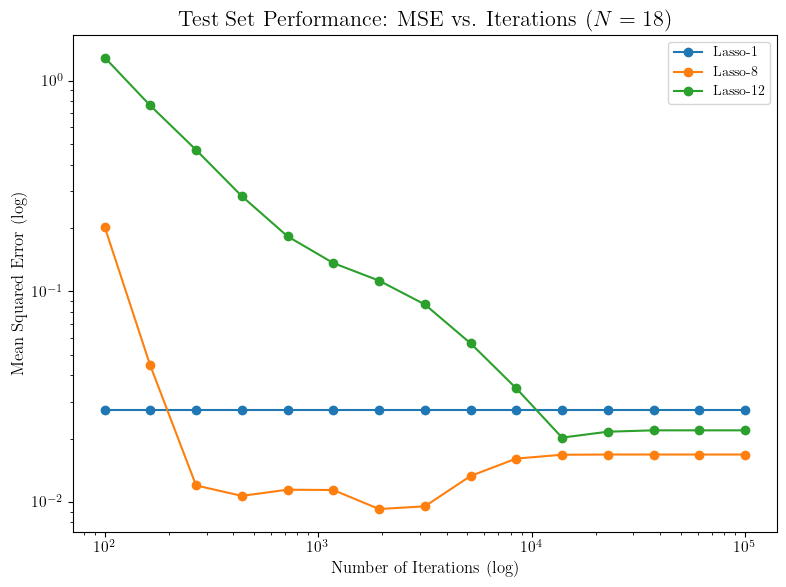

In [11]:
from utils import Gradient_OLS, Gradient_Ridge
# Gradient descent parameters, learning rate eta first
eta = 0.1
lam = 0.001
# Then number of iterations
num_iters = 100000
degrees = [1,8,12]
np.random.seed(42)
iter_saves = np.unique(np.logspace(2, np.log10(num_iters - 1), 15).astype(int))

# Initialize weights for gradient descent


# Gradient descent loop

plot_predict = {"Lasso" : { },
                "Ridge" : {}}
plot_train = {"Lasso":{ },
              "Ridge": { }}
theta_store = {"Lasso": {}, "Ridge": {}}
n = 18
x,y,y_noise = dataset(n)

y_centered = y - y.mean() 


for degree in degrees:
    X = polynomial_features(x, degree)
    scalar = StandardScaler()
    X = scalar.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y_centered, test_size=0.2, random_state=57)


    keys = ["Lasso"]
    for key in keys: 
        plot_predict[key][degree] = { "mse":[], "r2" : []}
        plot_train[key][degree] = { "mse":[], "r2" : []}  
        theta_store[key][degree] = []
        theta = np.random.randn(X_train.shape[1],1)

        for t in range(num_iters):
            # Compute gradients for OSL and Ridge
            if key == "Lasso":
                grad_OLS = Gradient_OLS(X_train, y_train, eta=eta,theta=theta, n=n) 
                theta -= eta * grad_OLS
                theta =  np.sign(theta) * np.maximum(0, np.abs(theta) - eta * lam)

            if t in iter_saves:
                y_pred = X_test @ theta
                y_train_pred= X_train @ theta
                plot_predict[key][degree]["mse"].append(MSE(y_test, y_pred))
                theta_store[key][degree].append(theta)
                plot_train[key][degree]["mse"].append(MSE(y_train, y_train_pred))



fig, ax = plt.subplots(figsize=small_figsize)

ax.set_title("Test Set Performance: MSE vs. Iterations ($N=18$)", fontsize=16) # FIX 1: Use ax.set_title()
for degree in degrees:
    ax.plot(iter_saves, plot_predict["Lasso"][degree]["mse"], 'o-', label=f"Lasso-{degree}")



ax.set_xlabel("Number of Iterations (log)", fontsize=12)
ax.set_xscale('log')
ax.set_ylabel("Mean Squared Error (log)", fontsize=12)
ax.set_yscale('log') 
ax.legend(fontsize=10)
plt.tight_layout()
plt.savefig("Lasso_MSE.pdf")
plt.show()




## Changing Learning rate

### momentum

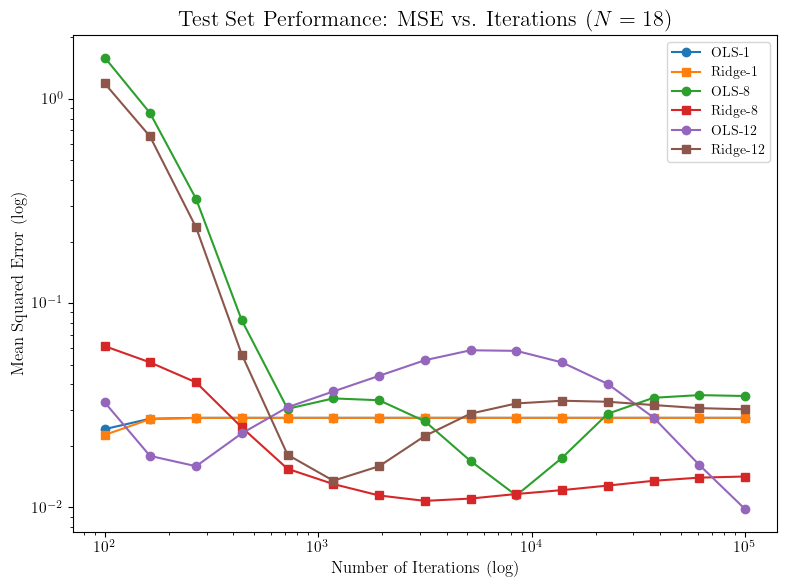

In [12]:
from utils import Gradient_OLS, Gradient_Ridge
# Gradient descent parameters, learning rate eta first
eta = 0.01
lam = 0.001
momentum = 0.6
# Then number of iterations
num_iters = 100000
degrees = [1,8,12]
np.random.seed(42)
iter_saves = np.unique(np.logspace(2, np.log10(num_iters - 1), 15).astype(int))

# Initialize weights for gradient descent


# Gradient descent loop

plot_predict = {"OLS" : { },
                "Ridge" : {}}
plot_train = {"OLS":{ },
              "Ridge": { }}
theta_store = {"OLS": {}, "Ridge": {}}

n = 18

x,y,y_noise = dataset(n)

y_centered = y - y.mean() 


for degree in degrees:
    X = polynomial_features(x, degree)
    scalar = StandardScaler()
    X = scalar.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y_centered, test_size=0.2, random_state=57)


    keys = ["OLS", "Ridge"]
    for key in keys: 
        plot_predict[key][degree] = { "mse":[], "r2" : []}
        plot_train[key][degree] = { "mse":[], "r2" : []}  
        theta_store[key][degree] = []
        theta = np.random.randn(X_train.shape[1],1)
        change = 0
        for t in range(num_iters):
            # Compute gradients for OSL and Ridge
            if key == "OLS":
                grad = Gradient_OLS(X_train, y_train, theta=theta, n=18)
            elif key =="Ridge":
                grad= Gradient_Ridge(X_train, y_train, lambda_param=lam,theta=theta, n=18)
            new_change =  eta * grad + momentum * change
            theta -= new_change
            change = new_change
            
            if t in iter_saves:
                y_pred = X_test @ theta
                y_train_pred= X_train @ theta
                plot_predict[key][degree]["mse"].append(MSE(y_test, y_pred))
                plot_predict[key][degree]["r2"].append(R2(y_test, y_pred))
                theta_store[key][degree].append(theta)
                plot_train[key][degree]["mse"].append(MSE(y_train, y_train_pred))
                plot_train[key][degree]["r2"].append(R2(y_train, y_train_pred))


fig, ax = plt.subplots(figsize=small_figsize)

ax.set_title("Test Set Performance: MSE vs. Iterations ($N=18$)", fontsize=16) # FIX 1: Use ax.set_title()
for degree in degrees:
    ax.plot(iter_saves, plot_predict["OLS"][degree]["mse"], 'o-', label=f"OLS-{degree}")
    ax.plot(iter_saves, plot_predict["Ridge"][degree]["mse"], 's-', label=f"Ridge-{degree}")


ax.set_xlabel("Number of Iterations (log)", fontsize=12)
ax.set_xscale('log')
ax.set_ylabel("Mean Squared Error (log)", fontsize=12)
ax.set_yscale('log') 
ax.legend(fontsize=10)
plt.tight_layout()
plt.savefig("OLS_Ridge_Momentum.pdf")
plt.show()

### Adagrad


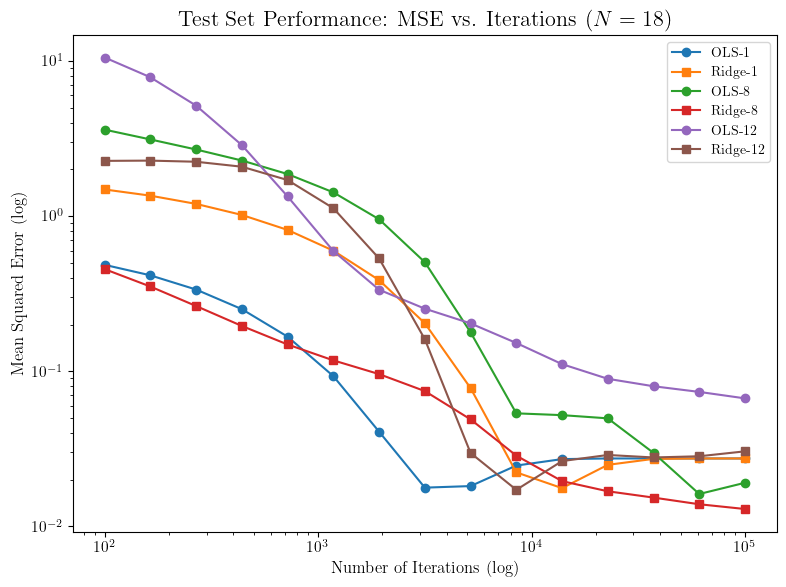

In [13]:
from utils import Gradient_OLS, Gradient_Ridge
# Gradient descent parameters, learning rate eta first
eta = 0.01
lam = 0.001
momentum = 0.6
delta = 1e-8
# Then number of iterations
num_iters = 100000
degrees = [1,8,12]
np.random.seed(42)
iter_saves = np.unique(np.logspace(2, np.log10(num_iters - 1), 15).astype(int))

# Initialize weights for gradient descent


# Gradient descent loop

plot_predict = {"OLS" : { },
                "Ridge" : {}}
plot_train = {"OLS":{ },
              "Ridge": { }}
theta_store = {"OLS": {}, "Ridge": {}}

n = 18

x,y,y_noise = dataset(n)

y_centered = y - y.mean() 


for degree in degrees:
    X = polynomial_features(x, degree)
    scalar = StandardScaler()
    X = scalar.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y_centered, test_size=0.2, random_state=57)


    keys = ["OLS", "Ridge"]
    for key in keys: 
        plot_predict[key][degree] = { "mse":[], "r2" : []}
        plot_train[key][degree] = { "mse":[], "r2" : []}  
        theta_store[key][degree] = []
        theta = np.random.randn(X_train.shape[1],1)

        giter = np.zeros((X_train.shape[1],1))
        change = 0
        for t in range(num_iters):
            # Compute gradients for OSL and Ridge
            if key == "OLS":
                grad = Gradient_OLS(X_train, y_train, theta=theta, n=18)
            elif key =="Ridge":
                grad= Gradient_Ridge(X_train, y_train, lambda_param=lam,theta=theta, n=18)
            giter += grad*grad
            change = eta /(np.sqrt(giter) + delta) * grad
            theta -= change
            
            if t in iter_saves:
                y_pred = X_test @ theta
                y_train_pred= X_train @ theta
                plot_predict[key][degree]["mse"].append(MSE(y_test, y_pred))
                plot_predict[key][degree]["r2"].append(R2(y_test, y_pred))
                theta_store[key][degree].append(theta)
                plot_train[key][degree]["mse"].append(MSE(y_train, y_train_pred))
                plot_train[key][degree]["r2"].append(R2(y_train, y_train_pred))


fig, ax = plt.subplots(figsize=small_figsize)

ax.set_title("Test Set Performance: MSE vs. Iterations ($N=18$)", fontsize=16) # FIX 1: Use ax.set_title()
for degree in degrees:
    ax.plot(iter_saves, plot_predict["OLS"][degree]["mse"], 'o-', label=f"OLS-{degree}")
    ax.plot(iter_saves, plot_predict["Ridge"][degree]["mse"], 's-', label=f"Ridge-{degree}")


ax.set_xlabel("Number of Iterations (log)", fontsize=12)
ax.set_xscale('log')
ax.set_ylabel("Mean Squared Error (log)", fontsize=12)
ax.set_yscale('log') 
ax.legend(fontsize=10)
plt.tight_layout()
plt.savefig("OLS_Ridge_AdaGrad.pdf")
plt.show()

### RMSprop

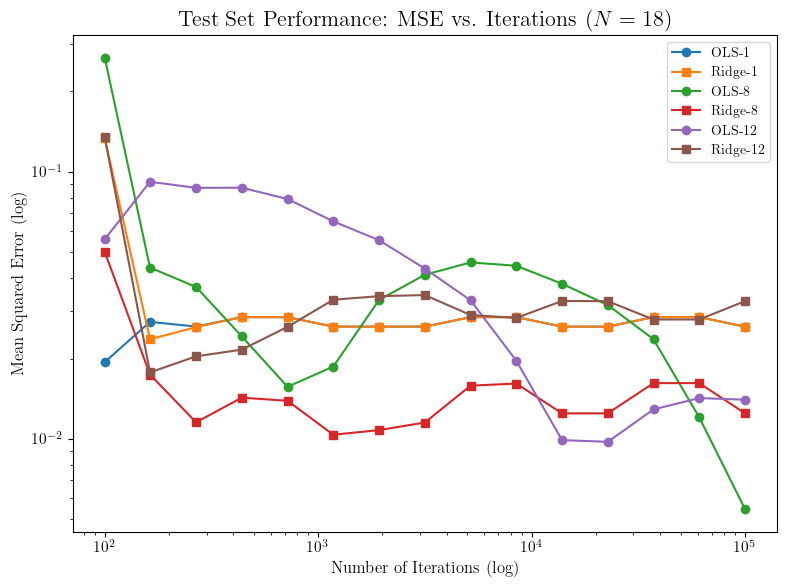

In [14]:
from utils import Gradient_OLS, Gradient_Ridge
# Gradient descent parameters, learning rate eta first
eta = 0.01
lam = 0.001
momentum = 0.6
delta = 1e-8
beta = 0.9
# Then number of iterations
num_iters = 100000
degrees = [1,8,12]
np.random.seed(42)
iter_saves = np.unique(np.logspace(2, np.log10(num_iters - 1), 15).astype(int))

# Initialize weights for gradient descent


# Gradient descent loop

plot_predict = {"OLS" : { },
                "Ridge" : {}}
plot_train = {"OLS":{ },
              "Ridge": { }}
theta_store = {"OLS": {}, "Ridge": {}}

n = 18

x,y,y_noise = dataset(n)

y_centered = y - y.mean() 


for degree in degrees:
    X = polynomial_features(x, degree)
    scalar = StandardScaler()
    X = scalar.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y_centered, test_size=0.2, random_state=57)


    keys = ["OLS", "Ridge"]
    for key in keys: 
        plot_predict[key][degree] = { "mse":[], "r2" : []}
        plot_train[key][degree] = { "mse":[], "r2" : []}  
        theta_store[key][degree] = []
        theta = np.random.randn(X_train.shape[1],1)

        giter = np.zeros((X_train.shape[1],1))
        change = 0
        for t in range(num_iters):
            # Compute gradients for OSL and Ridge
            if key == "OLS":
                grad = Gradient_OLS(X_train, y_train, theta=theta, n=18)
            elif key =="Ridge":
                grad= Gradient_Ridge(X_train, y_train, lambda_param=lam,theta=theta, n=18)
            giter = beta*giter + (1 -beta)*grad*grad
            change = eta /(np.sqrt(giter) + delta) * grad
            theta -= change


            if t in iter_saves:
                y_pred = X_test @ theta
                y_train_pred= X_train @ theta
                plot_predict[key][degree]["mse"].append(MSE(y_test, y_pred))
                plot_predict[key][degree]["r2"].append(R2(y_test, y_pred))
                theta_store[key][degree].append(theta)
                plot_train[key][degree]["mse"].append(MSE(y_train, y_train_pred))
                plot_train[key][degree]["r2"].append(R2(y_train, y_train_pred))


fig, ax = plt.subplots(figsize=small_figsize)

ax.set_title("Test Set Performance: MSE vs. Iterations ($N=18$)", fontsize=16) # FIX 1: Use ax.set_title()
for degree in degrees:
    ax.plot(iter_saves, plot_predict["OLS"][degree]["mse"], 'o-', label=f"OLS-{degree}")
    ax.plot(iter_saves, plot_predict["Ridge"][degree]["mse"], 's-', label=f"Ridge-{degree}")


ax.set_xlabel("Number of Iterations (log)", fontsize=12)
ax.set_xscale('log')
ax.set_ylabel("Mean Squared Error (log)", fontsize=12)
ax.set_yscale('log') 
ax.legend(fontsize=10)
plt.tight_layout()
plt.savefig("OLS_Ridge_RMSProp.pdf")
plt.show()

### ADAM

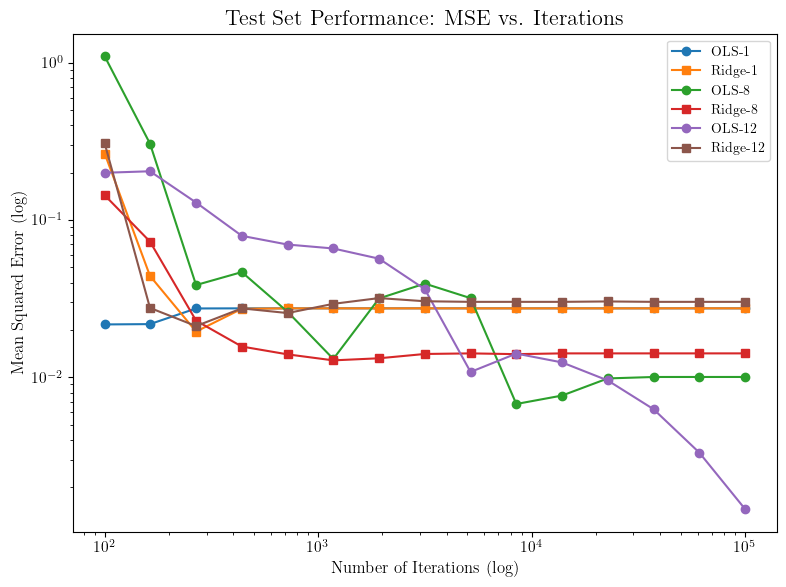

In [15]:
from utils import Gradient_OLS, Gradient_Ridge
# Gradient descent parameters, learning rate eta first
eta = 0.01
lam = 0.001
momentum = 0.6
delta = 1e-8
beta1 = 0.9
beta2 = 0.999
# Then number of iterations
num_iters = 100000
degrees = [1,8,12]
np.random.seed(42)
iter_saves = np.unique(np.logspace(2, np.log10(num_iters - 1), 15).astype(int))

# Initialize weights for gradient descent


# Gradient descent loop

plot_predict = {"OLS" : { },
                "Ridge" : {},}
plot_train = {"OLS":{ },
              "Ridge": { }}
theta_store = {"OLS": {}, "Ridge": {}}

n = 18

x,y,y_noise = dataset(n)

y_centered = y - y.mean() 


for degree in degrees:
    X = polynomial_features(x, degree)
    scalar = StandardScaler()
    X = scalar.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y_centered, test_size=0.2, random_state=57)


    keys = ["OLS", "Ridge"]
    for key in keys: 
        plot_predict[key][degree] = { "mse":[], "r2" : []}
        plot_train[key][degree] = { "mse":[], "r2" : []}  
        theta_store[key][degree] = []
        theta = np.random.randn(X_train.shape[1],1)
        momentum1 = np.zeros((X_train.shape[1],1))
        momentum2 = np.zeros((X_train.shape[1],1))
        giter = np.zeros((X_train.shape[1],1))
        change = 0
        for t in range(num_iters):
            # Compute gradients for OSL and Ridge
            if key == "OLS":
                grad = Gradient_OLS(X_train, y_train, theta=theta, n=18)
            elif key =="Ridge":
                grad= Gradient_Ridge(X_train, y_train, lambda_param=lam,theta=theta, n=18)
            momentum1 = beta1*momentum1 + (1 -beta1)*grad
            momentum2 = beta2*momentum2 + (1 -beta2)*grad*grad

            momentum1_corrected = momentum1 / (1 - beta1**(t+1))
            momentum2_corrected = momentum2 / (1 - beta2**(t+1))

            update_term = (eta / (np.sqrt(momentum2_corrected) + delta)) * momentum1_corrected
            theta -= update_term


            if t in iter_saves:
                y_pred = X_test @ theta
                y_train_pred= X_train @ theta
                plot_predict[key][degree]["mse"].append(MSE(y_test, y_pred))
                theta_store[key][degree].append(theta)
                plot_train[key][degree]["mse"].append(MSE(y_train, y_train_pred))


fig, ax = plt.subplots(figsize=small_figsize)

ax.set_title("Test Set Performance: MSE vs. Iterations", fontsize=16) # FIX 1: Use ax.set_title()
for degree in degrees:
    ax.plot(iter_saves, plot_predict["OLS"][degree]["mse"], 'o-', label=f"OLS-{degree}")
    ax.plot(iter_saves, plot_predict["Ridge"][degree]["mse"], 's-', label=f"Ridge-{degree}")


ax.set_xlabel("Number of Iterations (log)", fontsize=12)
ax.set_xscale('log')
ax.set_ylabel("Mean Squared Error (log)", fontsize=12)
ax.set_yscale('log') 
ax.legend(fontsize=10)
plt.tight_layout()
plt.savefig("OLS_Ridge_ADAM.pdf")
plt.show()

## Stochastic Gradient Descent



<>:78: SyntaxWarning: invalid escape sequence '\l'
<>:78: SyntaxWarning: invalid escape sequence '\l'
C:\Users\Anton\AppData\Local\Temp\ipykernel_19660\693319140.py:78: SyntaxWarning: invalid escape sequence '\l'
  ax.set_title("Test Set Performance: MSE vs. Iterations ($N=18,\lambda=.001,\eta=.01$)", fontsize=16) # FIX 1: Use ax.set_title()


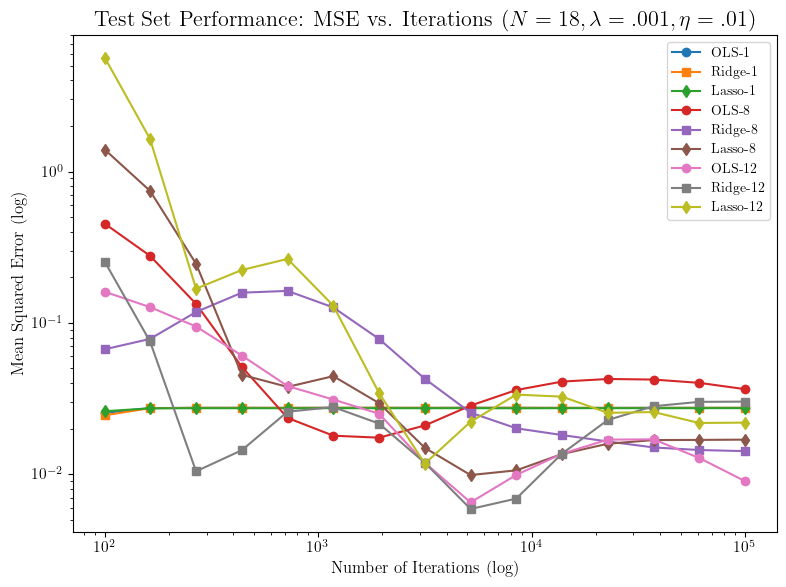

In [16]:
from utils import Gradient_OLS, Gradient_Ridge

# Gradient descent parameters, learning rate eta first
eta = 0.01
lam = 0.001
# Then number of iterations
num_iters = 100000
degrees = [1,8,12]
np.random.seed(42)
iter_saves = np.unique(np.logspace(2, np.log10(num_iters - 1), 15).astype(int))

# Initialize weights for gradient descent


# Gradient descent loop

plot_predict = {"OLS" : { },
                "Ridge" : {}, "Lasso" : {}}
plot_train = {"OLS":{ },
              "Ridge": { }, "Lasso": {}}
theta_store = {"OLS": {}, "Ridge": {}, "Lasso": {}}

x,y,y_noise = dataset(18)

y_centered = y - y.mean() 

batch_size = 6


for degree in degrees:
    X = polynomial_features(x, degree)
    scalar = StandardScaler()
    X = scalar.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y_centered, test_size=0.2, random_state=57)


    keys = ["OLS", "Ridge", "Lasso"]
    for key in keys: 
        plot_predict[key][degree] = { "mse":[], "r2" : []}
        plot_train[key][degree] = { "mse":[], "r2" : []}  
        theta_store[key][degree] = []
        theta = np.random.randn(X_train.shape[1],1)
        
        m = len(X_train)
        n_batches = int(m / batch_size)
        for epoch in range(num_iters):
            # Shuffle the data for each epoch
            indices = np.random.permutation(m)
            X_shuffled = X_train[indices]
            y_shuffled = y_train[indices]

            for i in range(0, m, batch_size):
            # Compute gradients for each batch
                xi = X_shuffled[i:i+batch_size]
                yi = y_shuffled[i:i+batch_size]
                
                if key == "OLS":
                    grad = Gradient_OLS(xi, yi, theta=theta,n=batch_size)
                    theta -= eta * grad
                elif key =="Ridge":
                    grad= Gradient_Ridge(xi, yi,  lambda_param=lam,theta=theta,n=batch_size)
                    theta -= eta * grad
                elif key == "Lasso":
                    grad_OLS = Gradient_OLS(xi, yi, eta=eta,theta=theta, n=batch_size) 
                    theta -= eta * grad_OLS
                    theta =  np.sign(theta) * np.maximum(0, np.abs(theta) - eta * lam)
            if epoch in iter_saves:
                y_pred = X_test @ theta
                y_train_pred= X_train @ theta
                plot_predict[key][degree]["mse"].append(MSE(y_test, y_pred))
                plot_predict[key][degree]["r2"].append(R2(y_test, y_pred))
                theta_store[key][degree].append(theta)
                plot_train[key][degree]["mse"].append(MSE(y_train, y_train_pred))
                plot_train[key][degree]["r2"].append(R2(y_train, y_train_pred))

fig, ax = plt.subplots(figsize=small_figsize)

ax.set_title("Test Set Performance: MSE vs. Iterations ($N=18,\lambda=.001,\eta=.01$)", fontsize=16) # FIX 1: Use ax.set_title()
for degree in degrees:
    ax.plot(iter_saves, plot_predict["OLS"][degree]["mse"], 'o-', label=f"OLS-{degree}")
    ax.plot(iter_saves, plot_predict["Ridge"][degree]["mse"], 's-', label=f"Ridge-{degree}")
    ax.plot(iter_saves, plot_predict["Lasso"][degree]["mse"], 'd-', label=f"Lasso-{degree}")


ax.set_xlabel("Number of Iterations (log)", fontsize=12)
ax.set_xscale('log')
ax.set_ylabel("Mean Squared Error (log)", fontsize=12)
ax.set_yscale('log') 
ax.legend(fontsize=10)
plt.tight_layout()
plt.savefig("StochasticDescent.pdf")
plt.show()


## Sampling Methods


### Bootstrap

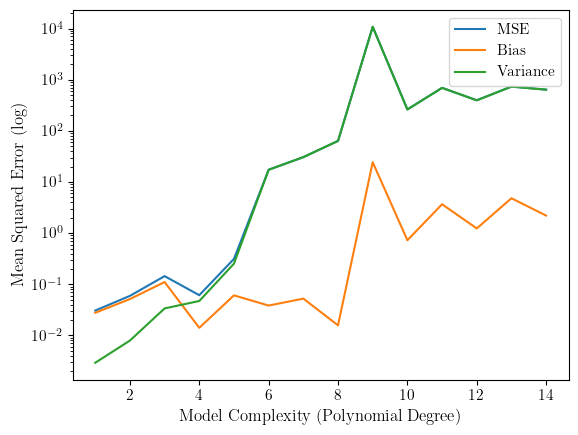

In [17]:
from sklearn.utils import resample
from utils import dataset
from sklearn.linear_model import LinearRegression

np.random.seed(42)

bootstraps = 1000

start_deg = 1
end_deg = 15

x,y,y_noise = dataset(18)




y_centered = y - y.mean()
biases = []
variances = []
mses = []

for p in range(start_deg, end_deg):
   X = polynomial_features(x, p)
   scaler = StandardScaler()
   X = scaler.fit_transform(X)
   X_train, X_test, y_train, y_test = train_test_split(X, y_centered, test_size=0.2, random_state=57)
    
   predictions = np.zeros((bootstraps, len(y_test)))
   targets = np.zeros((bootstraps, len(y_test)))

   for b in range(bootstraps):
      X_train_re, y_train_re = resample(X_train, y_train, random_state=b)
      model = LinearRegression(fit_intercept=False)
      model.fit(X_train_re, y_train_re)
      predictions[b, :] = model.predict(X_test).flatten()
      targets[b, :] = y_test.flatten()

   biases.append((np.mean(predictions, axis=0) - np.mean(targets, axis=0)) ** 2)
   variances.append(np.var(predictions, axis=0))
   mses.append(mean_squared_error(predictions, targets))

plt.plot(range(start_deg, end_deg), mses, label="MSE")
plt.plot(range(start_deg, end_deg), np.mean(biases, axis=1), label="Bias")
plt.plot(range(start_deg, end_deg), np.mean(variances, axis=1), label="Variance")
plt.xlabel("Model Complexity (Polynomial Degree)", fontsize=12)
plt.ylabel("Mean Squared Error (log)", fontsize=12)
plt.yscale('log')
plt.legend()
plt.savefig('bias_variance_tradeoff.pdf', format='pdf', bbox_inches='tight')
plt.show()


### Bootstrap sklearn

c:\Users\Anton\Documents\UiO Fag\FYS-STK4155 Anvendt dataanalyse og maskinlæring\Eget Arbeid\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.043e-04, tolerance: 1.599e-04
  model = cd_fast.enet_coordinate_descent(


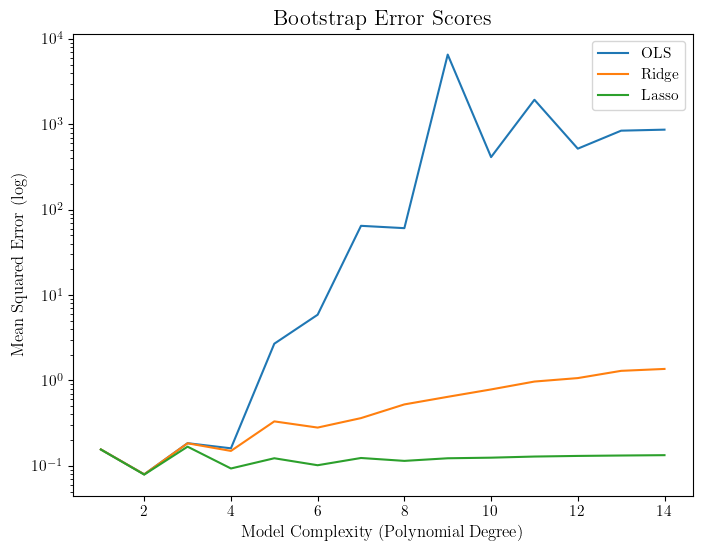

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from utils import polynomial_features, dataset


start_deg = 1
end_deg = 15
degrees = range(start_deg, end_deg)
x,y,y_noise = dataset(n=18)

y_centered = y - y.mean()
# Store the average MSE from the k-folds for each degree
mses_cv = {"OLS":[], "Ridge": [], "Lasso": []}

models = ["OLS","Ridge", "Lasso"]
bootstraps = 1000

for p in degrees:
    X = polynomial_features(x, p)
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(
            X, y_centered, test_size=0.2, random_state=42
        )
    
    for modeltype in models:
        fold_mses = []
        # Loop through each fold
        predictions = np.zeros((bootstraps, len(y_test)))
        targets = np.zeros((bootstraps, len(y_test)))
        bootstrap_mses = []

        for b in range(bootstraps):
            X_train_re, y_train_re = resample(X_train, y_train, random_state=b)
            if modeltype == "Lasso":
                model = Lasso(alpha=0.001, max_iter=100000, fit_intercept=False)
            elif modeltype == "Ridge":
                model = Ridge(alpha=0.001,fit_intercept=False)
            elif modeltype == "OLS":
                model = LinearRegression(fit_intercept=False)
            model.fit(X_train_re, y_train_re)
            y_pred_test = model.predict(X_test)
            mse = mean_squared_error(y_test, y_pred_test)
            bootstrap_mses.append(mse)

        mses_cv[modeltype].append(np.mean(bootstrap_mses))

fig, ax = plt.subplots(figsize=small_figsize)


ax.plot(degrees, mses_cv["OLS"],  label="OLS")
ax.plot(degrees, mses_cv["Ridge"],  label="Ridge")
ax.plot(degrees, mses_cv["Lasso"],  label="Lasso")


ax.set_xlabel("Model Complexity (Polynomial Degree)", fontsize=12)
ax.set_ylabel("Mean Squared Error (log)", fontsize=12) 
plt.title(f"Bootstrap Error Scores", fontsize=16)
ax.set_yscale('log') 
ax.legend()
plt.savefig("Bootstrap.pdf")
plt.show()


Really uninteresting result for this case with small cv, so to get something extra here we can look into seeing how it behaves when the datapoints increase also


### Heatmap with fixed bootstrap (not used)

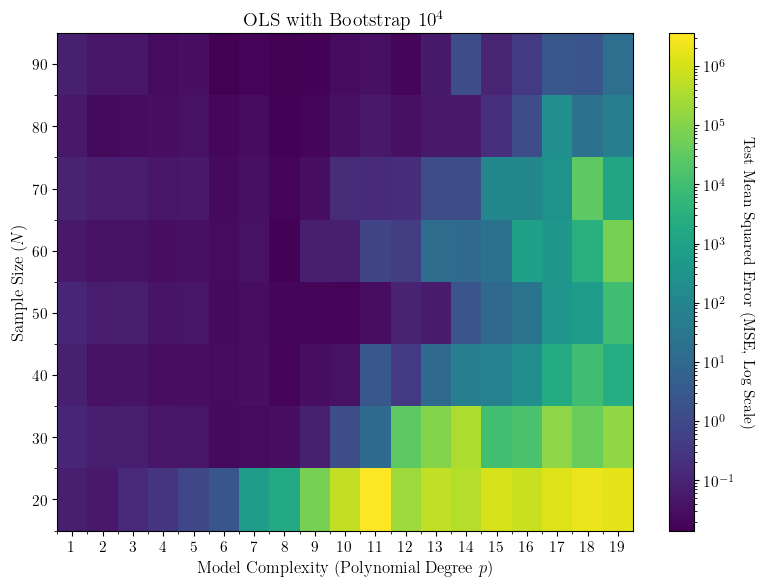

In [19]:
from utils import polynomial_features, dataset
import matplotlib.colors as colors


bootstraps = 1000
np.random.seed(42)
degrees = np.arange(1, 20)
N_values = np.arange(20, 100, 10)

mse_matrix = np.zeros((len(N_values), len(degrees)))

for i, N in enumerate(N_values):
    x, y, y_noisy = dataset(n=N)
    y_centered = y_noisy - y_noisy.mean()
    for j, degree in enumerate(degrees):
    
        X = polynomial_features(x, degree, intercept=True)
        # Standardize Features
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)
        # Split data (80/20 split)

        X_train, X_test, y_train, y_test = train_test_split(
            X_scaled, y_centered, test_size=0.2, random_state=42
        )
        # Predictions
        predictions = np.zeros((bootstraps, len(y_test)))
        targets = np.zeros((bootstraps, len(y_test)))

        for b in range(bootstraps):
            X_train_re, y_train_re = resample(X_train, y_train)
            beta = OLS_parameters(X_train_re, y_train_re)
            predictions[b, :] = (X_test @ beta).flatten()
            targets[b, :] = y_test.flatten()
        
        mse_matrix[i, j] = mean_squared_error(predictions, targets)


fig, ax = plt.subplots(figsize=small_figsize)

min_mse_val = np.clip(np.min(mse_matrix[np.nonzero(mse_matrix)]), 1e-6, None) # Ensure minimum is > 0
max_mse_val = np.max(mse_matrix)

c = ax.pcolormesh(degrees, N_values, mse_matrix, 
                  cmap='viridis',
                  norm=colors.LogNorm(vmin=min_mse_val, vmax=max_mse_val))

# Set labels and titles
ax.set_title('OLS with Bootstrap $10^4$', fontsize=14)
ax.set_xlabel('Model Complexity (Polynomial Degree $p$)', fontsize=12)
ax.set_ylabel('Sample Size ($N$)', fontsize=12)

# Adjust tick marks to show the specific degrees and N values tested
# Adjust x-ticks to be centered on the degrees
ax.set_xticks(degrees)
ax.set_xticklabels(degrees)
ax.set_xticks(degrees - 0.5, minor=True)
# Adjust y-ticks to be centered on the N values
ax.set_yticks(N_values)
ax.set_yticklabels(N_values)
N_step = N_values[1] - N_values[0]
ax.set_yticks(N_values - N_step / 2, minor=True)


# Add color bar
cbar = fig.colorbar(c, ax=ax)
cbar.ax.set_ylabel('Test Mean Squared Error (MSE, Log Scale)', rotation=-90, va="bottom")

# Save the figure
filename = "Bootstrap_Heatmap.pdf"
plt.tight_layout()
plt.savefig(filename)
plt.show()

### k-fold CV

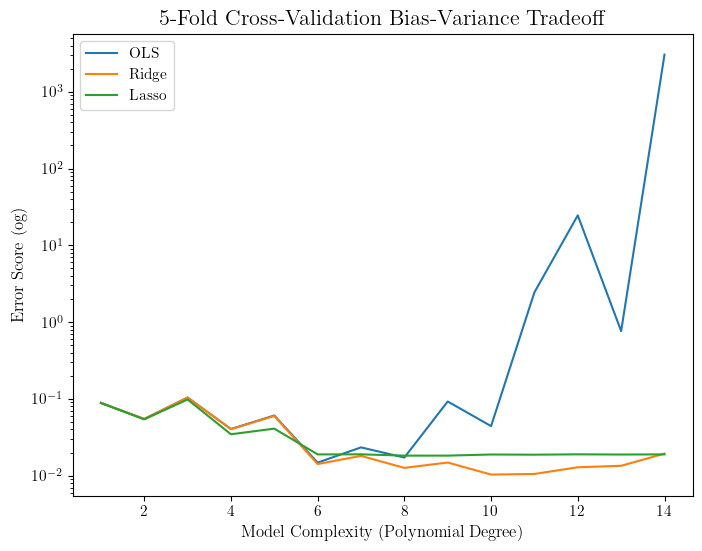

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from utils import polynomial_features, dataset



k = 5 
start_deg = 1
end_deg = 15
degrees = range(start_deg, end_deg)
x,y,y_noise = dataset(n=18)

y_centered = y - y.mean()
# Store the average MSE from the k-folds for each degree
mses_cv = {"OLS":[], "Ridge": [], "Lasso": []}

models = ["OLS","Ridge", "Lasso"]

for p in degrees:
    X = polynomial_features(x, p)
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    
    # KFold object provides train/test indices to split data
    kfold = KFold(n_splits=k, shuffle=True, random_state=88)
    
    # Store the MSE for each of the k folds
    for modeltype in models:
        fold_mses = []
        # Loop through each fold
        for train_indices, test_indices in kfold.split(X):
            # Split data for the current fold
            X_train, X_test = X[train_indices], X[test_indices]
            y_train, y_test = y_centered[train_indices], y_centered[test_indices]


            # Train model and make predictions
            if modeltype == "Lasso":
                model = Lasso(alpha=0.001, max_iter=100000, fit_intercept=False)
            elif modeltype == "Ridge":
                model = Ridge(alpha=0.001,fit_intercept=False)
            elif modeltype == "OLS":
                model = LinearRegression(fit_intercept=False)
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)

            # Calculate and store the MSE for this fold
            fold_mses.append(mean_squared_error(y_test, y_pred))

        # Average MSE across all k folds
        mses_cv[modeltype].append(np.mean(fold_mses))

fig, ax = plt.subplots(figsize=small_figsize)


ax.plot(degrees, mses_cv["OLS"],  label="OLS")
ax.plot(degrees, mses_cv["Ridge"],  label="Ridge")
ax.plot(degrees, mses_cv["Lasso"],  label="Lasso")


ax.set_xlabel("Model Complexity (Polynomial Degree)", fontsize=12)
ax.set_ylabel("Error Score (og)", fontsize=12) 
plt.title(f"{k}-Fold Cross-Validation Bias-Variance Tradeoff", fontsize=16)
ax.set_yscale('log') 
ax.legend()
plt.savefig("Cross_Validation.pdf")
plt.show()
